# Group 1:
# Gavin Stone, Isaac Adams, Kaden Hicklin, Owen Miller, Samuel Shevlin, Sullivan Gleason


Sacramentorealestatetransactions.csv questions: 
1.  With Hierarchical Indexing, rearrange the data to create a first dataframe which will have
    first level of index of city, second level of index of zip, please also rename index and
    column to make them more understandable, such as change zip to zipcode. Display the
    first eight rows of data. Do some plotting to reflect this new dataframe.
2.  Try stack and unstack with the above created dataframe. Display the first eight rows of
    data.
3.  With Hierarchical Indexing, rearrange the data to create a second dataframe which will
    have first level of index of city, second level of index of zip, columns of bed, bath and
    sale_date. Please also rename index and column to make them more understandable,
    such as change zip to zipcode. Display the first eight rows of data.
4.  Reshape the above two newly created dataframes and merge them.

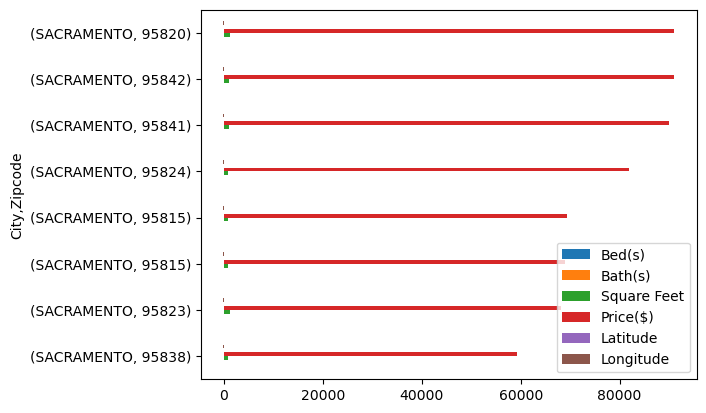

In [183]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df1 = df.set_index(['city','zip'])
df1.index.names = ['City', 'Zipcode']
df1.rename(columns={'beds': 'Bed(s)', 
                    'baths':'Bath(s)', 
                    'sale_date':'Sale Date', 
                    'street':'Street',
                    'state':'State',
                    'sq__ft':'Square Feet',
                    'type':'Property Type',
                    'price':'Price($)',
                    'latitude':'Latitude',
                    'longitude':'Longitude',}, inplace=True) 

df1.head(8)
df1.head(8).plot.barh()
plt.show()

In [2]:
#2. stack
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df1 = df.set_index(['city','zip'])
df1.index.names = ['City', 'Zipcode']
df1_stacked = df1.stack()
print(df1_stacked.head(8))

City        Zipcode           
SACRAMENTO  95838    street                       3526 HIGH ST
                     state                                  CA
                     beds                                    2
                     baths                                   1
                     sq__ft                                836
                     type                          Residential
                     sale_date    Wed May 21 00:00:00 EDT 2008
                     price                               59222
dtype: object


In [3]:
#2. unstack
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df2 = df.set_index(['city','zip'])
df2.index.names = ['City', 'Zipcode']
df2_unstacked = df2.unstack()
print(df2_unstacked.head(8))
# unstacking this particular dateframe always results in an "Index contains duplicate entries, cannot reshape" error

ValueError: Index contains duplicate entries, cannot reshape

In [68]:
#3.
import numpy as np 
import pandas as pd
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df1 = df.set_index(['city','zip'])
df3 = pd.DataFrame(data=df1, columns=['beds', 'baths', 'sale_date'])
df3.index.names = ['City', 'Zipcode']
df3.rename(columns={'beds': 'Bed(s)', 'baths':'Bath(s)', 'sale_date':'Sale Date'}, inplace=True) 
df3.head(8)

Bed(s)  Bath(s)                     Sale Date
City       Zipcode                                               
SACRAMENTO 95838         2        1  Wed May 21 00:00:00 EDT 2008
           95823         3        1  Wed May 21 00:00:00 EDT 2008
           95815         2        1  Wed May 21 00:00:00 EDT 2008
           95815         2        1  Wed May 21 00:00:00 EDT 2008
           95824         2        1  Wed May 21 00:00:00 EDT 2008
           95841         3        1  Wed May 21 00:00:00 EDT 2008
           95842         3        2  Wed May 21 00:00:00 EDT 2008
           95820         3        1  Wed May 21 00:00:00 EDT 2008

In [88]:
#4.
df = pd.read_csv('Sacramentorealestatetransactions.csv')

df1 = df.set_index(['city','zip'])
df1.index.names = ['City', 'Zipcode']
df1.rename(columns={'beds': 'Bed(s)', 
                    'baths':'Bath(s)', 
                    'sale_date':'Sale Date', 
                    'street':'Street',
                    'state':'State',
                    'sq__ft':'Square Feet',
                    'type':'Property Type',
                    'price':'Price($)',
                    'latitude':'Latitude',
                    'longitude':'Longitude',}, inplace=True) 

df3 = pd.DataFrame(data=df1, columns=['beds', 'baths', 'sale_date'])
df3.index.names = ['City', 'Zipcode']
df3.rename(columns={'beds': 'Bed(s)', 'baths':'Bath(s)', 'sale_date':'Sale Date'}, inplace=True) 

df4 = df1.combine_first(df3)
df4.head(8)

Bath(s)  Bed(s)   Latitude   Longitude  Price($)  \
City       Zipcode                                                     
SACRAMENTO 95838          1       2  38.631913 -121.434879     59222   
           95823          1       3  38.478902 -121.431028     68212   
           95815          1       2  38.618305 -121.443839     68880   
           95815          1       2  38.616835 -121.439146     69307   
           95824          1       2  38.519470 -121.435768     81900   
           95841          1       3  38.662595 -121.327813     89921   
           95842          2       3  38.681659 -121.351705     90895   
           95820          1       3  38.535092 -121.481367     91002   

                   Property Type                     Sale Date  Square Feet  \
City       Zipcode                                                            
SACRAMENTO 95838     Residential  Wed May 21 00:00:00 EDT 2008          836   
           95823     Residential  Wed May 21 00:00:00 EDT 2008         1167   
           95815     Residential  Wed May 21 00:00:00 EDT 2008          796   
           95815     Residential  Wed May 21 00:00:00 EDT 2008          852   
           95824     Residential  Wed May 21 00:00:00 EDT 2008          797   
           95841           Condo  Wed May 21 00:00:00 EDT 2008         1122   
           95842     Residential  Wed May 21 00:00:00 EDT 2008         1104   
           95820     Residential  Wed May 21 00:00:00 EDT 2008         1177   

                   State               Street  
City       Zipcode                             
SACRAMENTO 95838      CA         3526 HIGH ST  
           95823      CA          51 OMAHA CT  
           95815      CA       2796 BRANCH ST  
           95815      CA     2805 JANETTE WAY  
           95824      CA      6001 MCMAHON DR  
           95841      CA   5828 PEPPERMILL CT  
           95842      CA  6048 OGDEN NASH WAY  
           95820      CA        2561 19TH AVE

In [91]:
# or you can merge like this, which results in some NaN values 
df = pd.read_csv('Sacramentorealestatetransactions.csv')

df1 = df.set_index(['city','zip'])
df1.index.names = ['City', 'Zipcode']
df1.rename(columns={'beds': 'Bed(s)', 
                    'baths':'Bath(s)', 
                    'sale_date':'Sale Date', 
                    'street':'Street',
                    'state':'State',
                    'sq__ft':'Square Feet',
                    'type':'Property Type',
                    'price':'Price($)',
                    'latitude':'Latitude',
                    'longitude':'Longitude',}, inplace=True) 

df3 = pd.DataFrame(data=df1, columns=['beds', 'baths', 'sale_date'])
df3.index.names = ['City', 'Zipcode']
df3.rename(columns={'beds': 'Bed(s)', 'baths':'Bath(s)', 'sale_date':'Sale Date'}, inplace=True) 

df4 = pd.merge(df1, df3, on=['City','Zipcode'])
df4.head(8)

Street State  Bed(s)_x  Bath(s)_x  Square Feet  \
City       Zipcode                                                         
SACRAMENTO 95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   
           95838    3526 HIGH ST    CA         2          1          836   

                   Property Type                   Sale Date_x  Price($)  \
City       Zipcode                                                         
SACRAMENTO 95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   
           95838     Residential  Wed May 21 00:00:00 EDT 2008     59222   

                     Latitude   Longitude  Bed(s)_y  Bath(s)_y  Sale Date_y  
City       Zipcode                                                           
SACRAMENTO 95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN  
           95838    38.631913 -121.434879       NaN        NaN          NaN

credit-data-non-null.csv questions: 
1.  Write a custom function called cap_value(x, cap) that will set x to the cap if x > cap.
    Then apply it to debt_ratio with a cap of 5.
2.  Use groupby to calculate the percent of customers that went bad for each age
3.  Add a new column age_group for the dataframe. Divide the age into groups of every 10
    years in ascending order, then rearrange the data to match the age_group categorization.
    Display the first eight rows of data. Do some plotting to reflect it. Use age_group for
    data aggregation on revolving_utilization_of_unsecured_lines and monthly_income.
    Display the result.
4.  Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, display
    the first eight rows of data and do some plotting to reflect this it. Then do count, mean,
    max, min on revolving_utilization_of_unsecured_lines and monthly_income. Display the
    result. Then select the top five monthly_income values by group and display it

In [148]:
#1. 
import numpy as np
import pandas as pd
df = pd.read_csv("credit-data-non-null.csv")

CAP_VALUE = 5.0

def cap_value(data, cap):
    for i, ratio in enumerate(data['debt_ratio']):
        data.at[i, 'debt_ratio'] = min(ratio,CAP_VALUE)

cap_value(df,CAP_VALUE)
    
print(df["debt_ratio"].head(50))

0     0.802982
1     0.121876
2     0.085113
3     0.036050
4     0.024926
5     0.375607
6     0.209940
7     0.606291
8     0.309476
9     0.531529
10    0.298354
11    0.382965
12    5.000000
13    0.209892
14    0.188274
15    0.527888
16    0.065868
17    0.430046
18    0.475841
19    0.241104
20    0.085512
21    0.241622
22    1.595253
23    0.097672
24    0.042383
25    0.011761
26    0.436103
27    0.155201
28    0.472703
29    0.313812
30    0.257732
31    0.073539
32    0.567858
33    0.134078
34    0.009990
35    0.808340
36    0.539554
37    0.048211
38    0.170126
39    5.000000
40    0.177787
41    0.011168
42    0.689370
43    0.393662
44    0.256340
45    5.000000
46    0.824725
47    0.306381
48    0.008065
49    0.073148
Name: debt_ratio, dtype: float64


In [149]:
#2. 
import numpy as np
import pandas as pd
df = pd.read_csv("credit-data-non-null.csv")
bad_rate_by_age = 100 * df.groupby('age')['serious_dlqin2yrs'].mean()
print(bad_rate_by_age)

age
0       0.000000
21      7.103825
22      8.294931
23     10.920437
24     12.009804
         ...    
102     0.000000
103     0.000000
105     0.000000
107     0.000000
109     0.000000
Name: serious_dlqin2yrs, Length: 86, dtype: float64


In [191]:
#3. 
import numpy as np
import pandas as pd
df = pd.read_csv("credit-data-non-null.csv")

agegroups = [0, 29, 39, 49, 59, 69, 79, 89, 100, 110]
group_names = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109']
df['age_group'] = pd.cut(df['age'], bins=agegroups, labels=group_names, right=False)

df = df.sort_values(by='age_group')
df

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_group
85509,1,0.620380,25,1,0.161919,2000.0,2,0,0,1,4.0,0-29
125191,0,1.000000,22,0,117.000000,1.0,0,2,0,0,0.0,0-29
97408,1,1.000000,22,0,0.132275,1700.0,1,1,0,0,0.0,0-29
37298,0,0.716567,21,0,0.086379,300.0,2,0,0,0,0.0,0-29
5412,0,1.000000,25,0,0.440176,910.0,1,1,0,0,0.0,0-29
...,...,...,...,...,...,...,...,...,...,...,...,...
131552,0,0.003469,105,0,2.000000,1600.0,4,0,0,0,0.0,100-109
138295,0,0.000000,102,0,0.000000,3300.0,12,0,0,0,0.0,100-109
75215,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0,100-109
121771,0,0.069167,101,0,50.000000,0.0,2,0,0,0,0.0,100-109


In [188]:
#3 cont'd. 
aggregated_data = df.groupby('age_group').agg({'revolving_utilization_of_unsecured_lines': 'mean', 'monthly_income': 'mean'})
print(aggregated_data)

           revolving_utilization_of_unsecured_lines  monthly_income
age_group                                                          
0-29                                       3.580507     2340.105492
30-39                                      8.993818     4609.523746
40-49                                      8.242693     6053.582545
50-59                                      6.194452     6394.445368
60-69                                      3.689747     5746.546393
70-79                                      3.932477     4370.000823
80-89                                      2.982637     3976.997427
90-99                                      0.114684     3479.011579
100-109                                    0.126687     1629.538462


In [ ]:
#4. 